# Regression - Melb house prices
> "My first attempt on ML regression problem"

- toc: True
- branch: master
- badges: true
- categories: [Data Viz, ML]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

This is my first attempt to do a regression ML problem. I have previously followed a tutorial based on A Geron's book on a similar project. Time to try by myself. I start through a regression problem because it is the simplest and I am familiar with regression.

I chose house prices data in Melb since I know the place well. Ideally I would have done Jakarta, but I am still learning web scrapping.

House prices data are taken from the Kaggle competition: https://www.kaggle.com/anthonypino/melbourne-housing-market

Things I will attempt to do on this notebook:
* As many charts as possible to use interactive visualisation. 
* Using geopy. Successful to do this given full address, but that takes forever. Doing this in suburb level unsuccessful

# Import python libraries

In [1]:
# collapse
# download python libraries
from datetime import datetime, timedelta
import os
import glob
import wget
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import json
import plotly.express as px
import plotly.graph_objs as go

# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

from IPython.display import HTML

# Import data

In [2]:
# collapse
os.chdir("C:/Users/Riyan Aditya/Desktop/ML_learning/Project9_regression_melb_house_prices")
df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
df_b = pd.read_csv('Melbourne_housing_FULL.csv')

# Exploratory Data Analysis

The kaggle repo indicates that this data was from August 2018

First, lets see how many properties there are

In [3]:
# collapse
len(df)

63023

And with an average prices of

In [4]:
# collapse
round(df.Price.mean(),0)

997898.0

Wow, around 1M? they are expensive

In [5]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
Suburb           63023 non-null object
Address          63023 non-null object
Rooms            63023 non-null int64
Type             63023 non-null object
Price            48433 non-null float64
Method           63023 non-null object
SellerG          63023 non-null object
Date             63023 non-null object
Postcode         63023 non-null int64
Regionname       63023 non-null object
Propertycount    63023 non-null int64
Distance         63023 non-null float64
CouncilArea      63023 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [7]:
df.describe()

Rooms         Price      Postcode  Propertycount      Distance
count  63023.000000  4.843300e+04  63023.000000   63023.000000  63023.000000
mean       3.110595  9.978982e+05   3125.673897    7617.728131     12.684829
std        0.957551  5.934989e+05    125.626877    4424.423167      7.592015
min        1.000000  8.500000e+04   3000.000000      39.000000      0.000000
25%        3.000000  6.200000e+05   3056.000000    4380.000000      7.000000
50%        3.000000  8.300000e+05   3107.000000    6795.000000     11.400000
75%        4.000000  1.220000e+06   3163.000000   10412.000000     16.700000
max       31.000000  1.120000e+07   3980.000000   21650.000000     64.100000

C:\Users\Riyan Aditya\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\Riyan Aditya\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\Riyan Aditya\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\Riyan Aditya\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and

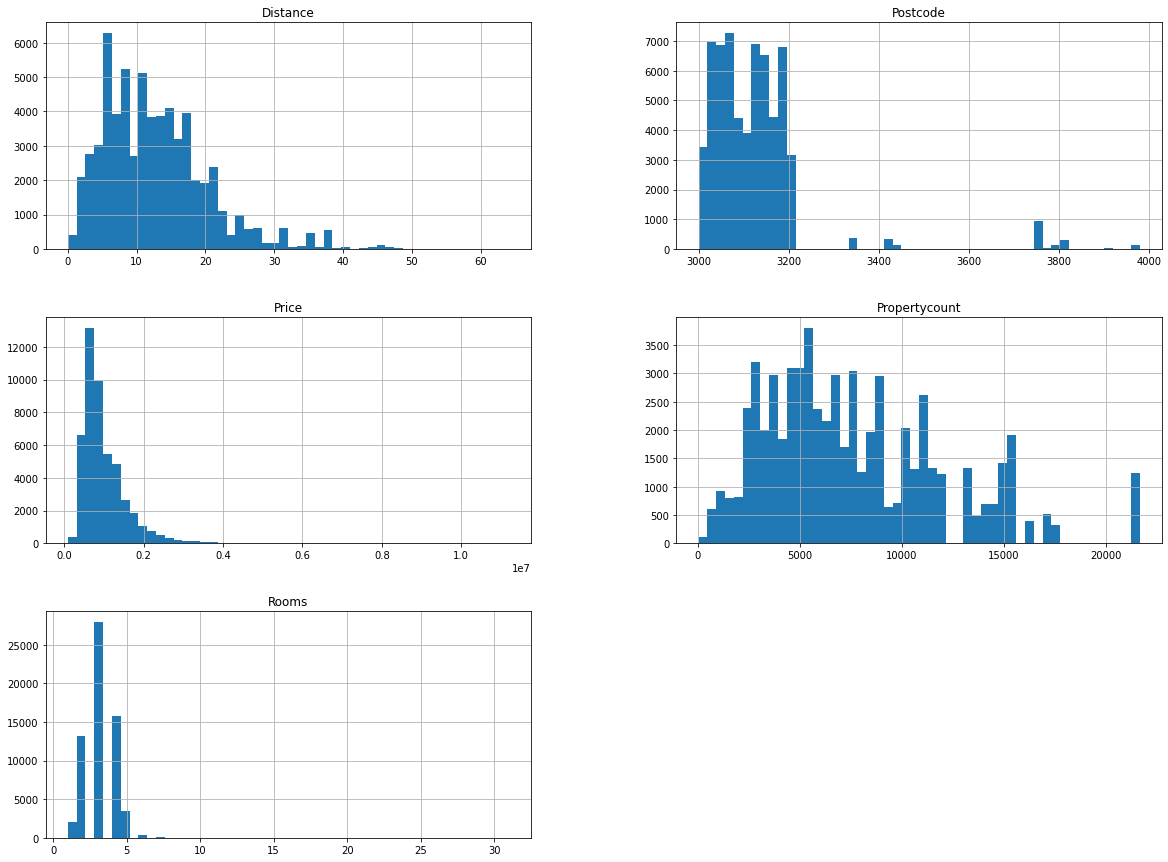

In [8]:
# collapse
df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
# collapse
# calculate the correlation matrix
corr = df.corr()
corr

Rooms     Price  Postcode  Propertycount  Distance
Rooms          1.000000  0.412438  0.093666      -0.048985  0.268289
Price          0.412438  1.000000  0.003112      -0.060769 -0.253668
Postcode       0.093666  0.003112  1.000000      -0.002557  0.500263
Propertycount -0.048985 -0.060769 -0.002557       1.000000  0.014050
Distance       0.268289 -0.253668  0.500263       0.014050  1.000000

## Null values in house prices

In [10]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

Ok, that is a lot of null values (25%). Let's remove all rows that have null values. Afterall, we are only interested in property prices 

In [11]:
# collapse
# delete all rows with empty prices
df = df[df['Price'].notna()]

## Prices

In [12]:
# collapse

import math
bin_width= 10**5
nbins = math.ceil((df["Price"].max() - df["Price"].min()) / bin_width)

fig1 = px.histogram(df, x="Price", nbins=nbins, marginal = 'rug')
#fig.update_traces(xbins_size = 10**5)
#fig.show()
HTML(fig1.to_html(include_plotlyjs='cdn'))

Looks like most house prices are between 0 to 2M, while there are several outliers where the most expensive is 11.2M!!!

Considering the price histogram is right skewed, perhaps, median is a better indication (especially when we are looking at per suburb)

Average price

In [13]:
df.Price.mean()

997898.2414882415

Median price

In [14]:
df.Price.median()

830000.0

## How many suburbs

In [15]:
# collapse
df.Suburb.value_counts()

Reservoir           1067
Bentleigh East       696
Richmond             642
Craigieburn          598
Preston              593
                    ... 
Coldstream             1
Seville                1
Yarra Junction         1
croydon                1
Belgrave Heights       1
Name: Suburb, Length: 370, dtype: int64

### Can i find lat long per address?

In [16]:
# collapse
# combine address with suburb
df['full_address'] = df['Address']+" "+df['Suburb']+' Victoria Australia'
df['full_address'][0]

'49 Lithgow St Abbotsford Victoria Australia'

In [17]:
# collapse
# additional library for geocode
from geopy.geocoders import Nominatim
from functools import partial
import time

In [18]:
#df['full_address'][0:10]

In [19]:
# collapse
# geolocator = Nominatim(user_agent="melb_address")
# geocode = partial(geolocator.geocode, language="en")

# aaa = df['full_address'][0:10].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
# aaa


Hmm. If I run everything to find coordinates for all 64k houses that will take forever

### Interactive map of median house price per suburb

Groupby per suburb

Note: attempted to extract coordinate per suburb by using Geopy, but unsuccessful. Extra lat long from a dataset provided by the kaggle OP instead.

In [20]:
# collapse

df2 = df.copy()
df2 = df2[['Suburb','Price','Rooms','Distance','Postcode']]

In [21]:
# collapse
df3 = df2.groupby('Suburb').median()
df3 = df3.reset_index()

df_b2 = df_b.groupby('Suburb')['Lattitude','Longtitude'].median().reset_index()

df3 = df3.merge(df_b2, on ='Suburb', how = 'inner')

In [22]:
# create map
px.set_mapbox_access_token(open("aa.mapbox_token.txt").read())
fig2 = px.scatter_mapbox(df3, lat = 'Lattitude',lon = 'Longtitude',color ='Price', 
                        color_continuous_scale=px.colors.sequential.algae,
                     size="Price",hover_name='Suburb',center = dict(lat=-37.80316 , lon =144.996430 ))

HTML(fig2.to_html(include_plotlyjs='cdn'))

## Price vs distance?

Are there any correlation between price and distance to CBD?

In [23]:
# collapse
fig3 = px.scatter(df, y='Price' ,x='Distance', title="Distance vs Price")
fig3.update_layout(yaxis_title='Median price')
HTML(fig3.to_html(include_plotlyjs='cdn'))

It looks like the further you are from CBD, the lower the median house prices

In [24]:
corr['Price']

Rooms            0.412438
Price            1.000000
Postcode         0.003112
Propertycount   -0.060769
Distance        -0.253668
Name: Price, dtype: float64

Seems that there are some correlation between price and distance, but not much

### 0-10 km

Text(0, 0.5, 'Median house price')

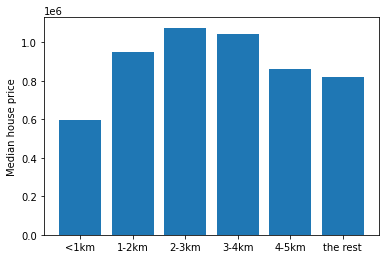

In [25]:
# collapse
bins = [0,1,2,3,4,5,200]
label = ['<1km','1-2km','2-3km','3-4km','4-5km','the rest']
df_05 = df.groupby(pd.cut(df.Distance, bins))['Price'].median()
plt.bar(label,df_05)
plt.ylabel('Median house price')

Interesting. Houses in CBD (perhaps smaller apartments) are relatively cheaper. Note that house sizes are not a factor here, simply average distance

## Price vs rooms

In [26]:
df.Rooms.value_counts()

3     21812
4     11576
2     10674
5      2350
1      1670
6       283
7        36
8        19
10        6
12        2
9         2
31        1
16        1
11        1
Name: Rooms, dtype: int64

In [27]:
# collapse
df_rooms = df.groupby('Rooms')['Price'].median()
fig4 = px.bar(df_rooms, title="Rooms vs Price")
fig4.update_layout(yaxis_title='Median price')
HTML(fig4.to_html(include_plotlyjs='cdn'))

Makes sense. Number of rooms increases, the more expensive the house becomes

## Price vs type

In [28]:
df.Type.value_counts()

h    34161
u     9292
t     4980
Name: Type, dtype: int64

We have three type of units: houses, units, townhosues

Do they differ in price?

In [29]:
# collapse
df_types = df.groupby('Type')['Price'].median()
fig5 = px.bar(df_types, title="Type vs Price")
fig5.update_layout(yaxis_title='Median price')
HTML(fig5.to_html(include_plotlyjs='cdn'))

Houses seems to be the most expensive, followed by town houses, then units

In [30]:
# collapse
fig6 = px.box(df,x='Type', y = 'Price' ,title="Type vs Price")
fig6.update_layout(yaxis_title='Price ($)')
HTML(fig6.to_html(include_plotlyjs='cdn'))

### price histogram per type

In [31]:
# collapse

import math
bin_width= 10**5
nbins = math.ceil((df["Price"].max() - df["Price"].min()) / bin_width)

fig7 = px.histogram(df, x="Price", nbins=nbins, color='Type',marginal = 'rug',
                  title='Melbourne houses prices based on unit type')
#fig.update_traces(xbins_size = 10**5)
HTML(fig7.to_html(include_plotlyjs='cdn'))

## Selling method

In [32]:
df.Method.value_counts()

S     30624
SP     6480
PI     5940
VB     5024
SA      365
Name: Method, dtype: int64

S is property sold, SP is property sold prior, PI is property passed in, VB is vendor bid and SA is sold after auction

In [33]:
# collapse
df_methods = df.groupby('Method')['Price'].median()
fig8 = px.bar(df_methods, title="Method vs Price")
fig8.update_layout(yaxis_title='Median price')
HTML(fig8.to_html(include_plotlyjs='cdn'))

Interesting. There are no significant difference between each method except vendor bid

In [34]:
# collapse
fig9 = px.box(df,x='Method', y = 'Price' ,title="Method vs Price")
fig9.update_layout(yaxis_title='Price ($)')
HTML(fig9.to_html(include_plotlyjs='cdn'))

## Council area vs price

In [35]:
# collapse
df_councils = df.groupby('CouncilArea')['Price','Distance'].median()
df_councils = df_councils.sort_values('Distance')
fig10 = px.bar(df_councils, y='Price', title="Council area vs Price (sorted by distance to CBD)")
fig10.update_layout(yaxis_title='Median price')
HTML(fig10.to_html(include_plotlyjs='cdn'))

Roughly, the further the council is, the cheaper the houses

## Region vs price

In [36]:
# collapse
df_regions = df.groupby('Regionname')['Price','Distance'].median()
fig11 = px.bar(df_regions, y='Price', title="Region vs Price")
fig11.update_layout(yaxis_title='Median price')
fig11.update_layout( xaxis={'categoryorder':'category ascending'})
HTML(fig11.to_html(include_plotlyjs='cdn'))

Again, metropolitan seems to be more expensive

# Data cleaning

There seems to be no need for data cleaning since the data has been cleaned by OP (Tony Pino) before uploading to Kaggle. 

Earlier, the houses that have no prices had been removed

Plan to prepare data for ML algo:
* Train test split. Going to use stratified sampling. Seems number of bedroom is relevant
* No imputing needed since the only missing data was prices and we have deleted rows with no prices
* OneHotEncoding for categorical variables (type, selling method and council). Note that suburb has too many variables while region has too few, so council is choosen instead.
* Feature Scaling via StandardScaler
* Create Pipeline transformer

In [37]:
corr.Price.sort_values(ascending=False)

Price            1.000000
Rooms            0.412438
Postcode         0.003112
Propertycount   -0.060769
Distance        -0.253668
Name: Price, dtype: float64

Looking at the correlation, rooms are an important variable. However, rooms have too many categories. We need to simplify this to maybe 5 to 6 categories (based on the number of rooms) 

## create room cat for stratified sampling

Rooms_cat categories:
* 1: 0-1 room
* 2: 1-2 room
* 3: 2-3 room
* 4: 3-4 room
* 5: 4-5 room
* 6: >6 room

In [38]:
# collapse
df['Rooms_cat'] = pd.cut(df["Rooms"],
                               bins=[0, 1, 2, 3, 4, 5, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])


In [39]:
df.Rooms_cat.value_counts()

3    21812
4    11576
2    10674
5     2350
1     1670
6      351
Name: Rooms_cat, dtype: int64

<AxesSubplot:>

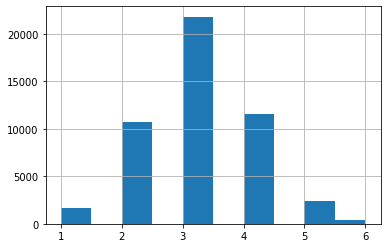

In [40]:
df.Rooms_cat.hist()

## Train test split via Stratified sampling

Create test set with 20% of the original data

In [41]:
# collapse
# apply Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(df, df['Rooms_cat']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

In [42]:
strat_test_set["Rooms_cat"].value_counts() / len(strat_test_set)

3    0.450397
4    0.238980
2    0.220398
5    0.048519
1    0.034479
6    0.007226
Name: Rooms_cat, dtype: float64

In [43]:
strat_train_set["Rooms_cat"].value_counts() / len(strat_train_set)

3    0.450343
4    0.239018
2    0.220384
5    0.048521
1    0.034481
6    0.007252
Name: Rooms_cat, dtype: float64

In [44]:
strat_train_set.shape, strat_test_set.shape

((38746, 15), (9687, 15))

In [45]:
# collapse
from plotly.subplots import make_subplots


fig12 = px.pie(strat_train_set,names='Rooms_cat',
              color_discrete_sequence=px.colors.sequential.Plasma)
fig12.update_traces(hovertemplate = "Rooms_cat:%{label} <br>Amount: %{value} ")

fig13 = px.pie(strat_test_set,names='Rooms_cat',labels = label,
              color_discrete_sequence=px.colors.sequential.Teal)
fig13.update_traces(hovertemplate = "Rooms_cat:%{label} <br>Amount: %{value} ")

trace1 = fig12['data'][0]
trace2 = fig13['data'][0]

fig14 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig14.add_trace(trace1, row=1, col=1)
fig14.add_trace(trace2, row=1, col=2)

fig14.update_layout(showlegend=False)
fig14.update_layout(title_text='Training vs test dataset breakdown'
                  ,annotations =[dict(text='Training set', x=0.18, y=1.1, font_size=20, showarrow=False),
                              dict(text='Test set', x=0.82, y=1.1, font_size=20, showarrow=False)])
HTML(fig14.to_html(include_plotlyjs='cdn'))




Training and test set now have the same proportion based on number of rooms

## Clean test and train set from variables that wont be used

In [46]:
strat_train_set.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea', 'full_address', 'Rooms_cat'],
      dtype='object')

In [47]:
strat_test_set.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea', 'full_address', 'Rooms_cat'],
      dtype='object')

In [48]:
# collapse
X_train = strat_train_set[['CouncilArea','Distance','Rooms_cat','Type','Method']]
y_train = strat_train_set.Price.copy()

X_test = strat_test_set[['CouncilArea','Distance','Rooms_cat','Type','Method']]
y_test = strat_test_set.Price.copy()

In [49]:
# collapse
X_train.head()

CouncilArea  Distance Rooms_cat Type Method
35717        Monash City Council      16.7         4    h      S
15417         Yarra City Council       2.1         2    h      S
45499  Port Phillip City Council       7.2         3    u     SP
728        Moreland City Council       5.2         3    h      S
32329     Melbourne City Council       1.8         3    h     VB

Split to numerical and categorical to prepare for pipeline

In [50]:
# collapse
# split to numerical and categorical to prepare for pipeline
X_train_num = X_train[['Rooms_cat','Distance']]
X_train_cat = X_train[['CouncilArea','Type','Method']]

## Standard scaler

Apply standard scaler since the variable distance is much larger than rooms

In [51]:
# collapse
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('std_scaler',StandardScaler())])

In [52]:
# collapse
# apply numercial pipeline trial
X_train_num_tr = num_pipeline.fit_transform(X_train_num)

In [53]:
X_train_num_tr

array([[ 1.00920161,  0.53311461],
       [-1.15756345, -1.40060124],
       [-0.07418092, -0.72512515],
       ...,
       [ 1.00920161,  1.75162048],
       [-1.15756345,  0.45364683],
       [-0.07418092,  0.70529479]])

## OHE

Regression requires numerical attribute. so convert all category variables via OHE (Council, Type, Method)

In [54]:
# collapse
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

# apply numercial pipeline tria
X_train_cat_tr = cat_encoder.fit_transform(X_train_cat)

In [55]:
X_train_cat_tr.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Apply pipeline

In [56]:
list(X_train_cat), list(X_train_num)

(['CouncilArea', 'Type', 'Method'], ['Rooms_cat', 'Distance'])

In [57]:
# collapse
from sklearn.compose import ColumnTransformer

num_attribs = list(X_train_num)
cat_attribs = list(X_train_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline,num_attribs),
    ("cat",cat_encoder,cat_attribs)
])

X_train_prepared = full_pipeline.fit_transform(X_train)

In [58]:
X_train_prepared

<38746x44 sparse matrix of type '<class 'numpy.float64'>'
	with 193730 stored elements in Compressed Sparse Row format>

In [59]:
X_train_prepared.shape

(38746, 44)

# Select and train model

## Linear regression

In [60]:
# collapse
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

lets try to the first 5 data

In [61]:
# collapse
# lets try to the first 5 data
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions :", lin_reg.predict(some_data_prepared))

Predictions : [1339783.42238791 1207835.055696   1067805.20722272 1135637.07993019
 1525488.71234305]


Compare against the actual values:

In [62]:
print("Labels:", list(some_labels))

Labels: [1220000.0, 1336000.0, 770000.0, 1100000.0, 1400000.0]


Not too bad

### MSE & MAE

In [63]:
# collapse
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train_predictions = lin_reg.predict(X_train_prepared)
lin_mse = mean_squared_error(X_train_predictions, y_train)
lin_rmse = np.sqrt(lin_mse)
print("RMSE =",lin_rmse)

lin_mae = mean_absolute_error(X_train_predictions, y_train)
print("MAE =",lin_mae)

RMSE = 383570.1465041156
MAE = 249536.7459705455


380k RMSE is not too bad considering the house prices are in 1-2 M

## Decision Tree

In [64]:
# collapse
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_prepared, y_train)

DecisionTreeRegressor(random_state=42)

In [65]:
# collapse
X_train_pred_tree = tree_reg.predict(X_train_prepared)
tree_mse = mean_squared_error(X_train_pred_tree, y_train)
tree_rmse = np.sqrt(tree_mse)
print("RMSE =",tree_rmse)

RMSE = 273959.98370858666


Seems like DT has lower RMSE than linear regression

# Fine tune model

## Better evaluation via cross val

In [66]:
# collapse
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train_prepared, y_train, scoring = "neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [67]:
# collapse
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [324798.10379948 337735.54076006 330201.67755583 331939.44527877
 331003.92093241]
Mean: 331135.7376653084
Standard deviation: 4129.377526309486


In [68]:
# collapse
lin_scores = cross_val_score(lin_reg, X_train_prepared, y_train,scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [384501.17139735 387880.98114637 379457.29643916 390707.64209541
 377260.56044861]
Mean: 383961.5303053785
Standard deviation: 5027.016041937786


Without cross validation, RMSE:
* Linear = 383k
* DT = 274k

With cross validation, RMSE:
* Linear = 384k
* DT = 331k

Seems like the DT overfit without cross validation. Whereas the linear model performs very similar

## Try RandomForests

In [69]:
# collapse
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state = 42)
forest_reg.fit(X_train_prepared, y_train)

RandomForestRegressor(random_state=42)

In [70]:
# collapse
X_train_pred_rf = forest_reg.predict(X_train_prepared)
rf_scores = cross_val_score(forest_reg, X_train_prepared, y_train,scoring="neg_mean_squared_error", cv=5)
rf_rmse_scores = np.sqrt(-rf_scores)
display_scores(rf_rmse_scores)

Scores: [314994.91904795 325593.20672449 323475.15308222 320622.59709846
 321517.39368951]
Mean: 321240.653928527
Standard deviation: 3561.052811977034


RF has an RMSE of 321 k

## Try SVR

In [71]:
# collapse
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train_prepared, y_train)
X_train_pred_svm = svm_reg.predict(X_train_prepared)
svm_scores = cross_val_score(svm_reg, X_train_prepared, y_train,scoring="neg_mean_squared_error", cv=5)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)
        

Scores: [609787.91630338 613672.87615397 602372.9778416  620121.62071317
 595273.34348275]
Mean: 608245.746898976
Standard deviation: 8667.653247189583


RMSE of 608k. terrible

## Fine tune via grid search

Since RF is best, lets fine tune just the RF model

In [72]:
# collapse
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[3,10,30,50,100], 'max_features':[2,4,6,8]},
              {'bootstrap':[False],'n_estimators':[3,30,100], 'max_features':[2,8]}]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 8],
                          'n_estimators': [3, 30, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [73]:
# collapse
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

330383.3627200613 {'max_features': 2, 'n_estimators': 3}
323211.32295121235 {'max_features': 2, 'n_estimators': 10}
321575.91754455114 {'max_features': 2, 'n_estimators': 30}
321673.56777115795 {'max_features': 2, 'n_estimators': 50}
321657.04429392307 {'max_features': 2, 'n_estimators': 100}
330883.69338457164 {'max_features': 4, 'n_estimators': 3}
322791.9775940429 {'max_features': 4, 'n_estimators': 10}
321548.77227169415 {'max_features': 4, 'n_estimators': 30}
321424.8251180729 {'max_features': 4, 'n_estimators': 50}
321240.6222027967 {'max_features': 4, 'n_estimators': 100}
330380.9535512754 {'max_features': 6, 'n_estimators': 3}
323097.1061609161 {'max_features': 6, 'n_estimators': 10}
321193.92971380404 {'max_features': 6, 'n_estimators': 30}
321036.8968902753 {'max_features': 6, 'n_estimators': 50}
321021.43204733415 {'max_features': 6, 'n_estimators': 100}
330488.90810906736 {'max_features': 8, 'n_estimators': 3}
322591.0491165248 {'max_features': 8, 'n_estimators': 10}
321071

Lowest score is:

In [74]:
# collapse
# lowest score is
np.sqrt(-max(cvres["mean_test_score"]))

320831.9232222634

Grid search helped a little

In [75]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 100}

# Final model

In [76]:
# collapse
final_model = grid_search.best_estimator_

In [77]:
# collapse
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [78]:
final_rmse

320133.4700532548

Final error is similar to the cross validation error. Both are around 320k. This is not bad considering house prices are in 1-2M range